# 🔹UFC ETL

## 1. Import Libraries and Setup Environment

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

## 2. Load Data

In [ ]:
# Define the path to the CSV file
file_path = os.path.join(project_root, 'data', 'raw', 'ufc_raw.csv')

ufc_raw = pd.read_csv(file_path)
print(f"Data loaded: {ufc_raw.shape[0]} rows and {ufc_raw.shape[1]} columns.")

## 3. Preview

In [ ]:
# Preview the first few records
display(ufc_raw.head())

# General dataset information
ufc_raw.info()

## 4. Selección de columnas de interés

In [ ]:
ufc_raw = ufc_raw[['RedFighter', 'BlueFighter','Winner',
       'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds',
       'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
       'BlueLongestWinStreak', 'BlueLosses',
       'BlueTotalRoundsFought', 'BlueTotalTitleBouts',
       'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit',
       'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission',
       'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance',
       'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs',
       'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws',
       'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt',
       'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses',
       'RedTotalRoundsFought', 'RedTotalTitleBouts',
       'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit',
       'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission',
       'RedWinsByTKODoctorStoppage', 'RedWins', 'RedStance', 'RedHeightCms',
       'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif',
       'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif',
       'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif',
       'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif', 'BetterRank']]

## 4. Check 

In [ ]:
# Null values check
nulls = ufc_raw.isnull().sum()
print("\nNull values per column:\n", nulls[nulls > 0])

# Duplicate analysis
duplicates = ufc_raw.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

## 5. Data Cleaning

In [ ]:
# Drop irrelevant columns (e.g., IDs or redundant columns)
#irrelevant = ['fight_id', 'fighter_id', 'event_id']
#df.drop(columns=irrelevant, inplace=True, errors='ignore')

# Remove duplicate rows
#ufc_raw.drop_duplicates(inplace=True)

# Drop columns with too many null values (threshold: 30%)
threshold = 0.3 * len(ufc_raw)
cols_to_drop = [col for col in ufc_raw.columns if ufc_raw[col].isnull().sum() > threshold]
ufc_raw.drop(columns=cols_to_drop, inplace=True)

# Fill remaining null values with mean or mode, depending on the data type
for col in ufc_raw.columns:
    if ufc_raw[col].dtype == 'object':
        mode = ufc_raw[col].mode()[0]
        ufc_raw[col] = ufc_raw[col].fillna(mode)
    else:
        mean = ufc_raw[col].mean()
        ufc_raw[col] = ufc_raw[col].fillna(mean)

## 6. Preview Clean Data

In [ ]:
# Preview the first few records
display(ufc_raw.head())

# General dataset information
ufc_raw.info()



In [183]:
print(ufc_raw['WeightClass'].unique())

['Welterweight' 'Featherweight' 'Flyweight' 'Light Heavyweight'
 'Bantamweight' 'Lightweight' "Women's Flyweight" "Women's Strawweight"
 'Heavyweight' 'Catch Weight' 'Middleweight' "Women's Bantamweight"
 "Women's Featherweight"]


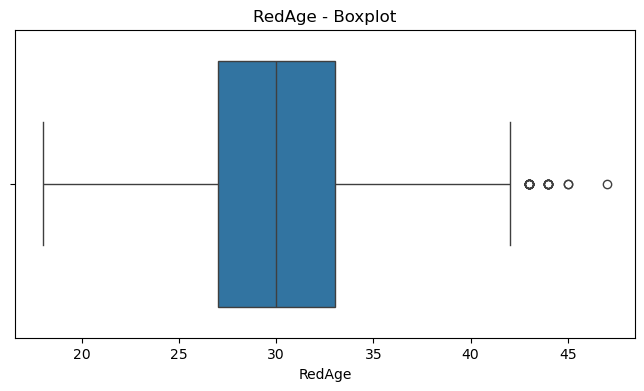

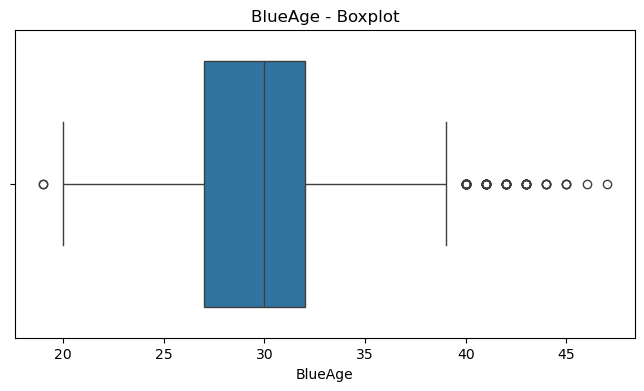

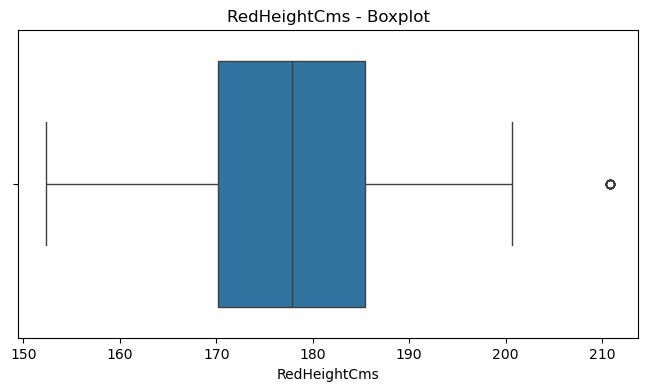

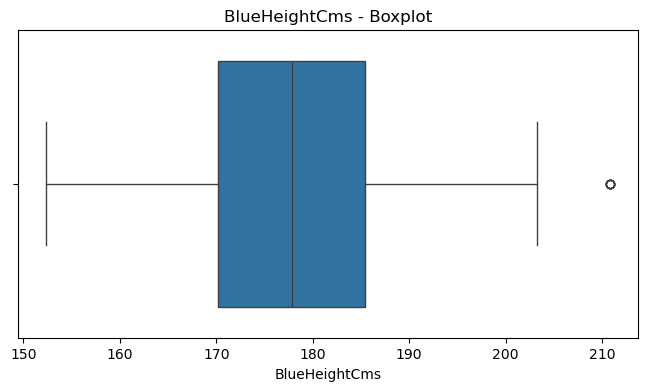

In [170]:
cols = ['RedAge', 'BlueAge', 'RedHeightCms', 'BlueHeightCms']

import seaborn as sns
import matplotlib.pyplot as plt

for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=ufc_raw[col])
    plt.title(f'{col} - Boxplot')
    plt.show()

In [171]:
ufc_raw = pd.get_dummies(ufc_raw, columns=['TitleBout', 'Gender', 'Winner'], drop_first=True)


In [172]:
ufc_raw['WeightClass'] = ufc_raw['WeightClass'].str.strip().str.title()

## 7. Check Clean Data

In [173]:
# Null values check
nulls = ufc_raw.isnull().sum()
print("\nNull values per column:\n", nulls[nulls > 0])

# Duplicate analysis
duplicates = ufc_raw.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Null values per column:
 Series([], dtype: int64)

Duplicate rows: 0


In [174]:
categorical_cols = ['RedFighter', 'BlueFighter', 'WeightClass', 'BetterRank']
binary_cols = ['TitleBout_True', 'Gender_MALE', 'Winner_Red']

for col in categorical_cols:
    ufc_raw[col] = ufc_raw[col].astype('category')

for col in binary_cols:
    ufc_raw[col] = ufc_raw[col].astype(int)  # asegúrate de que son 0/1

In [175]:
# Preview the first few records
display(ufc_raw.head())
display(ufc_raw.columns)
# Para ver los tipos de dato de cada columna:
display(ufc_raw.dtypes)


,RedFighter,BlueFighter,WeightClass,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,...,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BetterRank,TitleBout_True,Gender_MALE,Winner_Red
0,Colby Covington,Joaquin Buckley,Welterweight,5,0,5,0,5,4,34,...,-2.54,10.16,-6,0.25,-0.2,-1.83,Red,0,1,0
1,Cub Swanson,Billy Quarantillo,Featherweight,3,1,0,0,4,4,28,...,5.08,0.00,-5,2.69,0.7,0.20,neither,0,1,1
2,Manel Kape,Bruno Silva,Flyweight,3,0,4,0,4,2,16,...,-2.54,-7.62,3,-1.12,-0.2,1.72,Red,0,1,1
3,Vitor Petrino,Dustin Jacoby,Light Heavyweight,3,2,0,1,4,6,35,...,2.54,-2.54,9,2.68,-0.8,-3.62,neither,0,1,0
4,Adrian Yanez,Daniel Marcos,Bantamweight,3,0,4,0,4,0,13,...,0.00,-2.54,0,-0.57,0.0,0.25,neither,0,1,0


Index(['RedFighter', 'BlueFighter', 'WeightClass', 'NumberOfRounds',
       'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
       'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought',
       'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority',
       'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous',
       'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage',
       'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms',
       'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak',
       'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt',
       'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses',
       'RedTotalRoundsFought', 'RedTotalTitleBouts',
       'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit',
       'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission',
       'RedWinsByTKODoctorStoppage', 'RedWins', 'RedStance', 'RedHeightCms',
       'RedReachCms', 'RedWeightL

RedFighter               category
BlueFighter              category
WeightClass              category
NumberOfRounds              int64
BlueCurrentLoseStreak       int64
                           ...   
AvgTDDif                  float64
BetterRank               category
TitleBout_True              int64
Gender_MALE                 int64
Winner_Red                  int64
Length: 66, dtype: object

## 6. Save

In [146]:
# Save the cleaned file
ufc_raw.to_csv(f'{project_root}/data/processed/ufc_etl.csv', index=False)
print("\nETL file saved as 'ufc_etl.csv'.")


ETL file saved as 'ufc_etl.csv'.
